In [14]:
import pandas as pd

movies_raw = pd.read_csv(r'E:\AnalystBuilderTestFolder\imdb_movies.csv')
movies = movies_raw
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [6]:
movies.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [16]:
movies.drop_duplicates(inplace = True)

In [20]:
movies.dropna(subset = ['genres'], inplace = True)

In [24]:
movies['profit'] = movies['revenue'] - movies['budget']

In [318]:
movies_sub = movies[['popularity', 'budget', 'revenue', 'profit', 'original_title', 'runtime', 'genres', 'release_year', 'vote_count', 'vote_average']]

In [320]:
split = movies_sub['genres'].str.split('|', expand = True).stack()
split.index = split.index.droplevel(-1)
split.name = 'genre(s)'
del movies_sub['genres']
movies_sub = movies_sub.join(split)

In [142]:
###movies_sub[movies_sub['vote_count'] > 50]


,popularity,budget,revenue,profit,original_title,runtime,release_date,vote_count,vote_average,genre(s)
0,32.985763,150000000,1513528810,1363528810,Jurassic World,124,6/9/15,5562,6.5,Action
0,32.985763,150000000,1513528810,1363528810,Jurassic World,124,6/9/15,5562,6.5,Adventure
0,32.985763,150000000,1513528810,1363528810,Jurassic World,124,6/9/15,5562,6.5,Science Fiction
0,32.985763,150000000,1513528810,1363528810,Jurassic World,124,6/9/15,5562,6.5,Thriller
1,28.419936,150000000,378436354,228436354,Mad Max: Fury Road,120,5/13/15,6185,7.1,Action
...,...,...,...,...,...,...,...,...,...,...
10827,0.410366,1377800,0,-1377800,Batman,105,7/30/66,99,5.9,Science Fiction
10827,0.410366,1377800,0,-1377800,Batman,105,7/30/66,99,5.9,Crime
10833,0.737730,0,0,0,How to Steal a Million,123,7/13/66,67,7.3,Comedy
10833,0.737730,0,0,0,How to Steal a Million,123,7/13/66,67,7.3,Crime


In [186]:
genre_count = pd.DataFrame(movies_sub.groupby('genre(s)').original_title.nunique()).sort_values('original_title', ascending = True)

<Axes: title={'center': 'Movies by Genre'}, ylabel='original_title'>

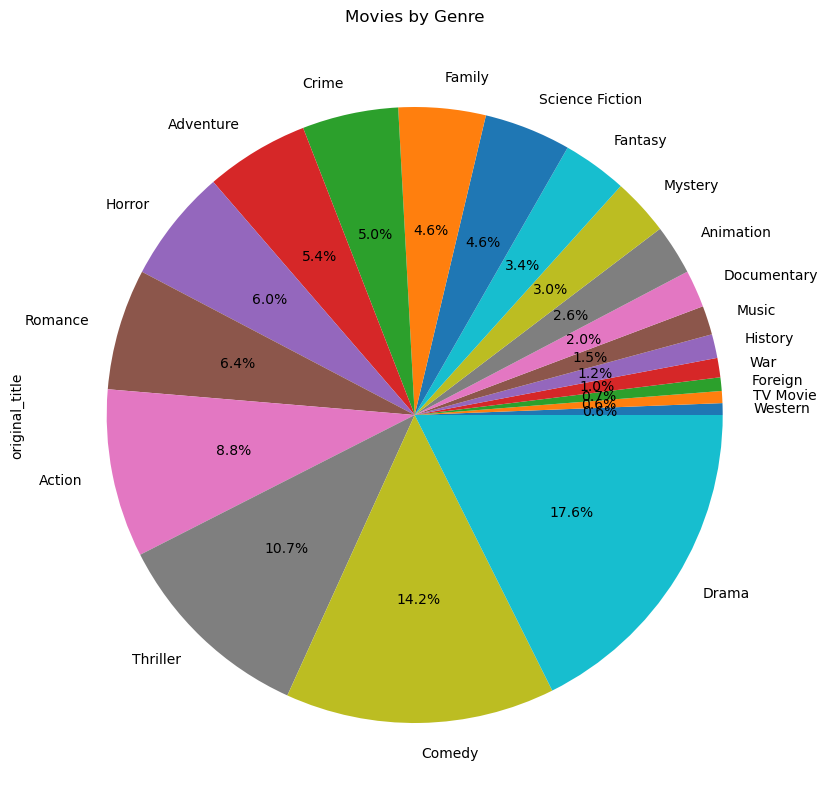

In [188]:
genre_count['original_title'].plot.pie(title = 'Movies by Genre', autopct= '%1.1f%%', figsize = (10,10))

<Axes: title={'center': 'Movies by Genre'}, ylabel='genre(s)'>

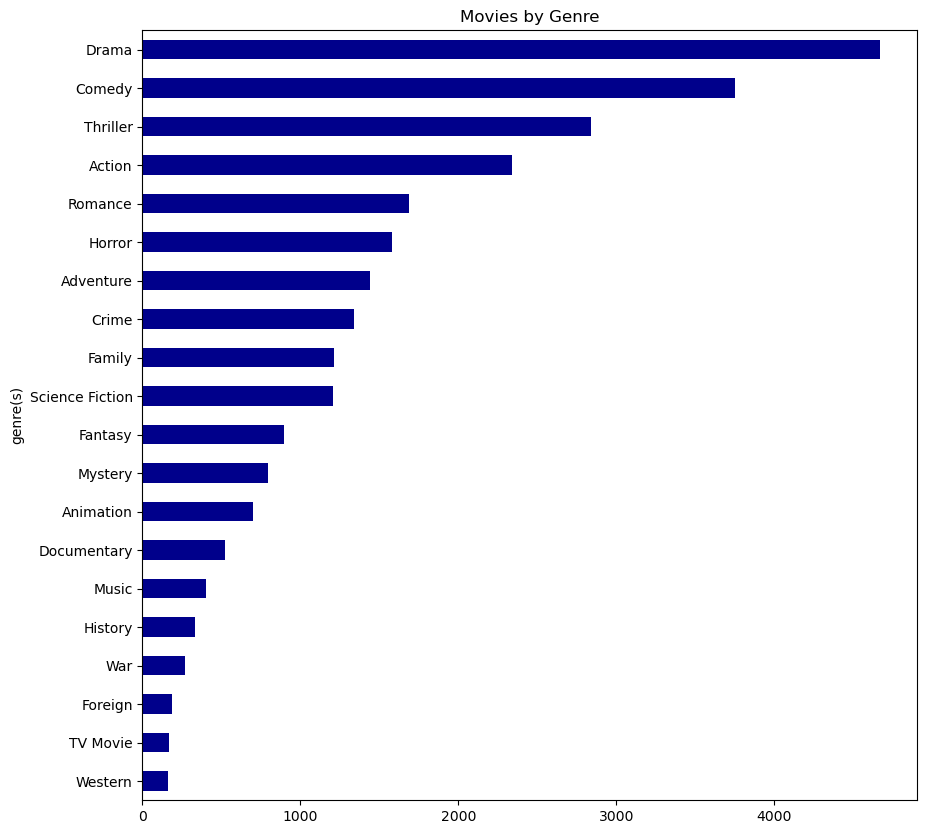

In [190]:
genre_count['original_title'].plot.barh(title = 'Movies by Genre', color= 'DarkBlue', figsize = (10,10))

In [224]:
genres_avg = movies_sub.groupby('genre(s)').mean(numeric_only = True)
pd.options.display.float_format = '{:2f}'.format

genres_avg.sort_values('budget', ascending = True, inplace = True)
genres_avg

,popularity,budget,revenue,profit,runtime,vote_count,vote_average
genre(s),,,,,,,
TV Movie,0.270896,267664.670659,251497.005988,-16167.664671,91.982036,34.365269,5.788024
Documentary,0.181432,577149.148077,2041106.994231,1463957.846154,102.651923,35.105769,6.908462
Foreign,0.191496,1451434.925532,1520459.835106,69024.909574,107.228723,16.627660,5.981383
Horror,0.465357,6226529.210751,16822808.624313,10596279.413561,94.424557,120.059866,5.337447
Music,0.487321,9438627.549020,28571768.691176,19133141.142157,105.137255,124.340686,6.480392
Drama,0.591495,11880717.773529,29232255.725840,17351537.952311,110.478151,182.544538,6.165546
Romance,0.592082,12531271.847547,35691972.327103,23160700.479556,106.891355,166.070678,6.042874
Comedy,0.592607,13297915.618244,37526242.072238,24228326.453994,96.745057,176.436330,5.905167
Mystery,0.690012,16119270.062963,40217566.661728,24098296.598765,105.928395,236.998765,5.946790


<Axes: title={'center': 'Budget-Revenue by Genre'}, ylabel='genre(s)'>

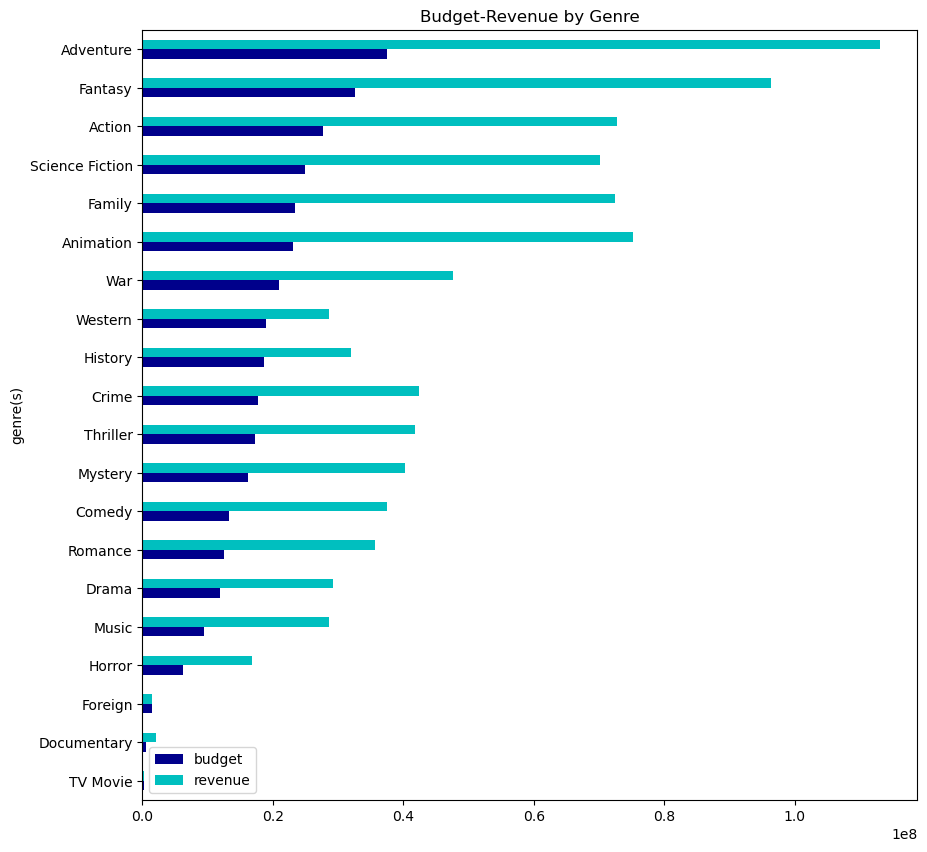

In [226]:
genres_avg[['budget', 'revenue']].plot.barh(title = 'Budget-Revenue by Genre', color= ('DarkBlue', 'c'), figsize = (10,10))

In [230]:
genres_avg.sort_values('profit', ascending = True, inplace = True)

<Axes: title={'center': 'profit by Genre'}, ylabel='genre(s)'>

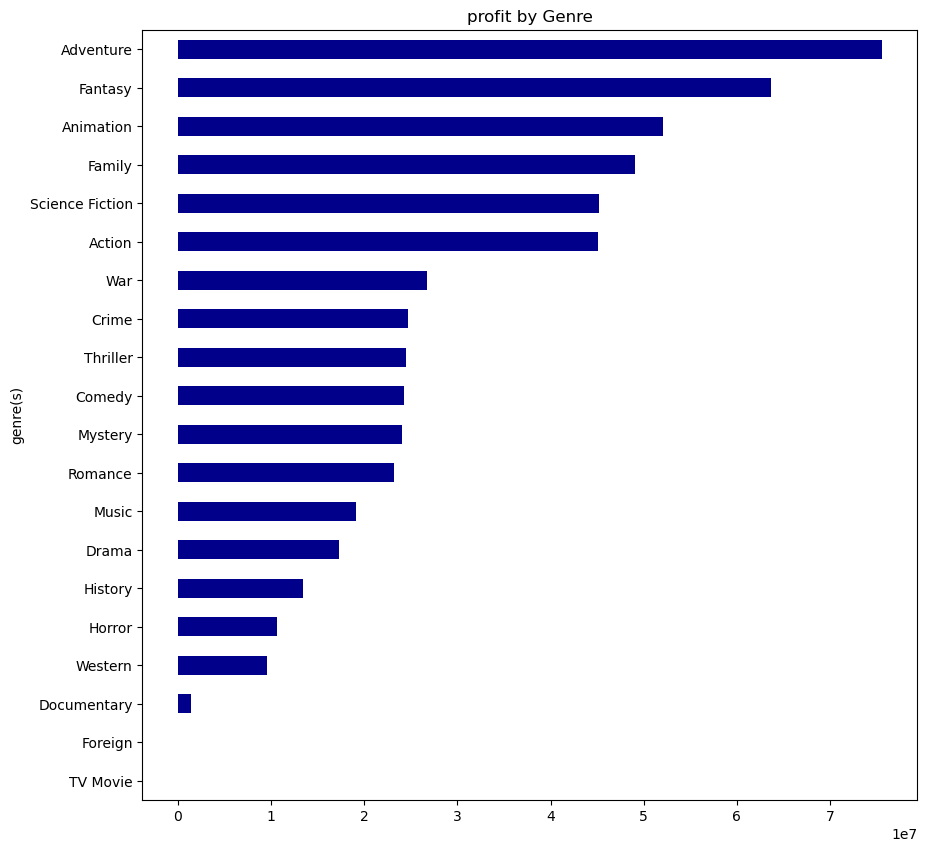

In [232]:
genres_avg['profit'].plot.barh(title = 'profit by Genre', color= 'DarkBlue', figsize = (10,10))

In [234]:
genres_avg.sort_values('popularity', ascending = True, inplace = True)

<Axes: title={'center': 'popularity by Genre'}, ylabel='genre(s)'>

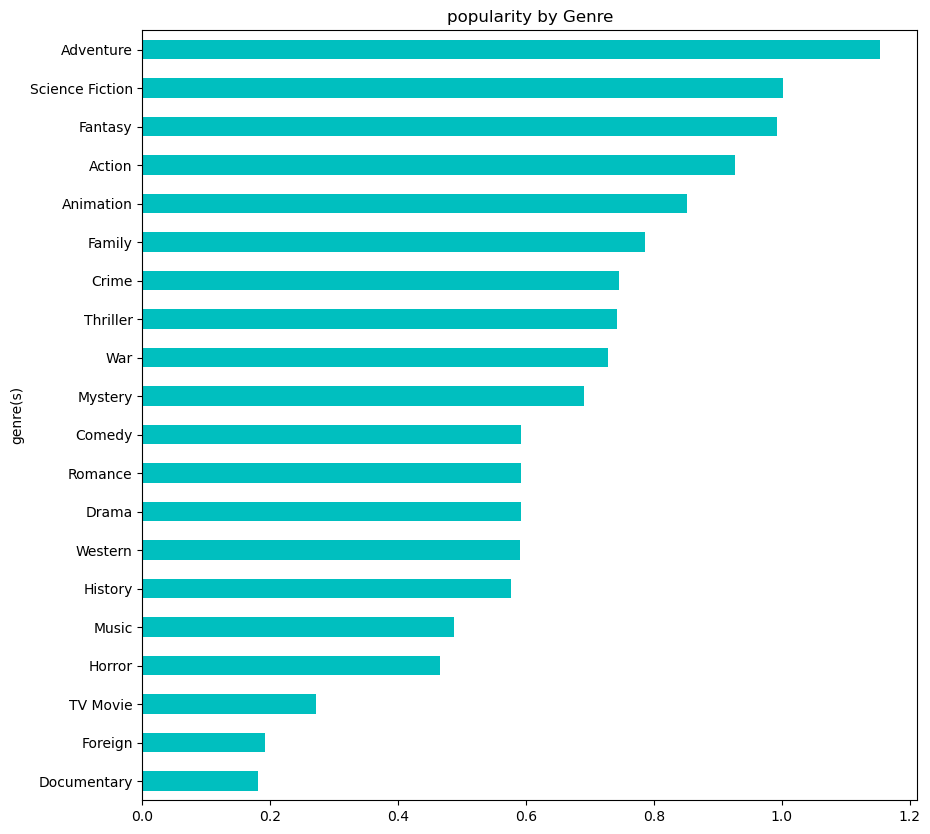

In [236]:
genres_avg['popularity'].plot.barh(title = 'popularity by Genre', color= 'c', figsize = (10,10))

<Axes: title={'center': 'vote_average by Genre'}, ylabel='genre(s)'>

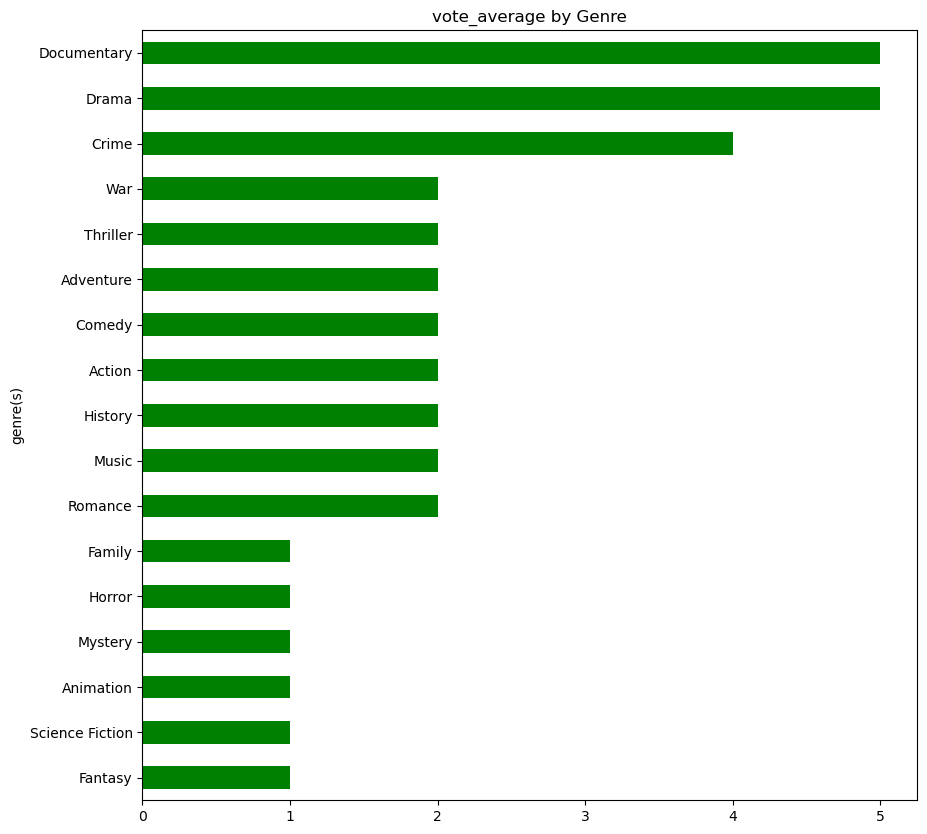

In [264]:
vote_fifty = movies_sub[(movies_sub['vote_count'] >= 50) & (movies_sub['vote_average'] >= 8)]

genres_vote = pd.DataFrame(vote_fifty.groupby('genre(s)').vote_average.nunique()).sort_values('vote_average', ascending = True)

genres_vote['vote_average'].plot.barh(title = 'vote_average by Genre', color= 'green', figsize = (10,10))

In [268]:
movies_decent_sample = movies_sub[movies_sub['vote_count'] >= 50]
movies_decent_sample.corr(method = 'spearman', numeric_only = True)

,popularity,budget,revenue,profit,runtime,vote_count,vote_average
popularity,1.000000,0.496554,0.606165,0.516448,0.231128,0.776718,0.213364
budget,0.496554,1.000000,0.723696,0.343588,0.355018,0.573096,-0.036132
revenue,0.606165,0.723696,1.000000,0.841594,0.346976,0.699428,0.126505
profit,0.516448,0.343588,0.841594,1.000000,0.223173,0.598132,0.217354
runtime,0.231128,0.355018,0.346976,0.223173,1.000000,0.269755,0.260482
vote_count,0.776718,0.573096,0.699428,0.598132,0.269755,1.000000,0.307466
vote_average,0.213364,-0.036132,0.126505,0.217354,0.260482,0.307466,1.000000


<Axes: xlabel='vote_average', ylabel='profit'>

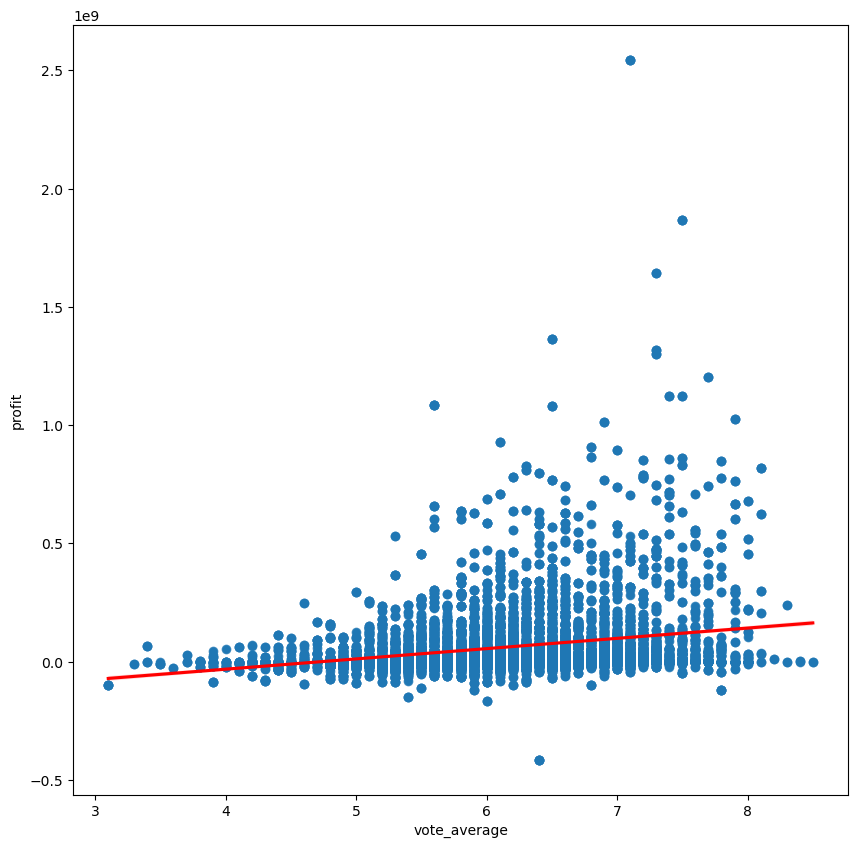

In [292]:
import seaborn as sns

movies_decent_sample.plot.scatter(x = 'vote_average', y = 'profit', figsize = (10,10)) 

sns.regplot(x = 'vote_average', y = 'profit', data = movies_decent_sample, line_kws = {'color': 'red'})

<Axes: xlabel='popularity', ylabel='profit'>

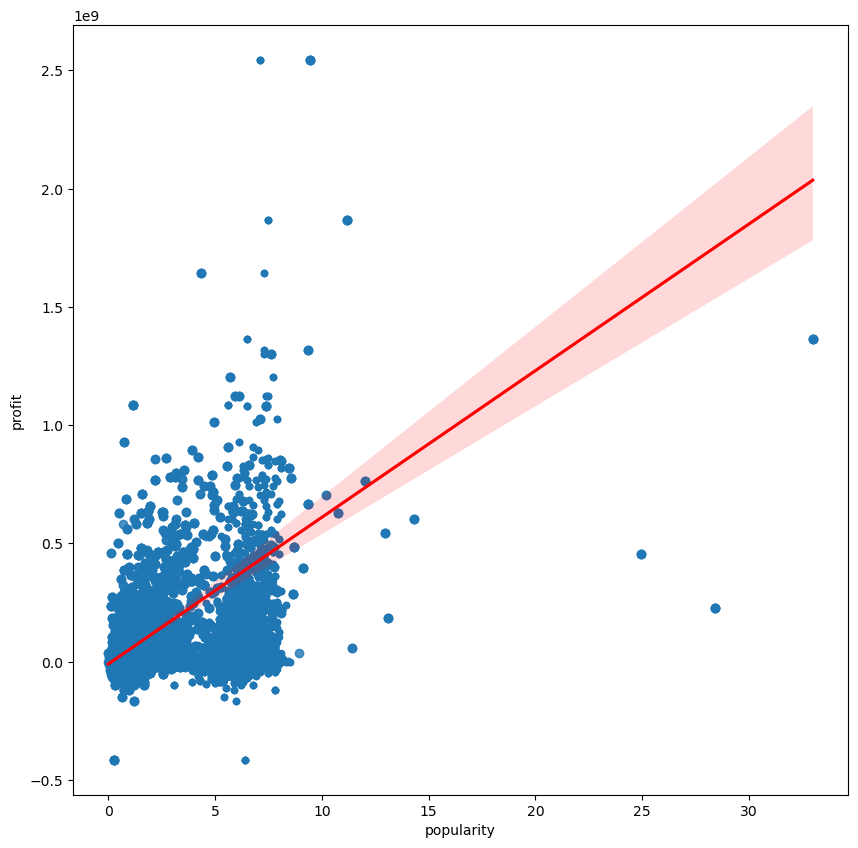

In [304]:
movies_decent_sample.plot.scatter(x = 'vote_average', y = 'profit', figsize = (10,10)) 

sns.regplot(x = 'popularity', y = 'profit', data = movies_decent_sample, line_kws = {'color': 'red'})

<Axes: xlabel='budget', ylabel='profit'>

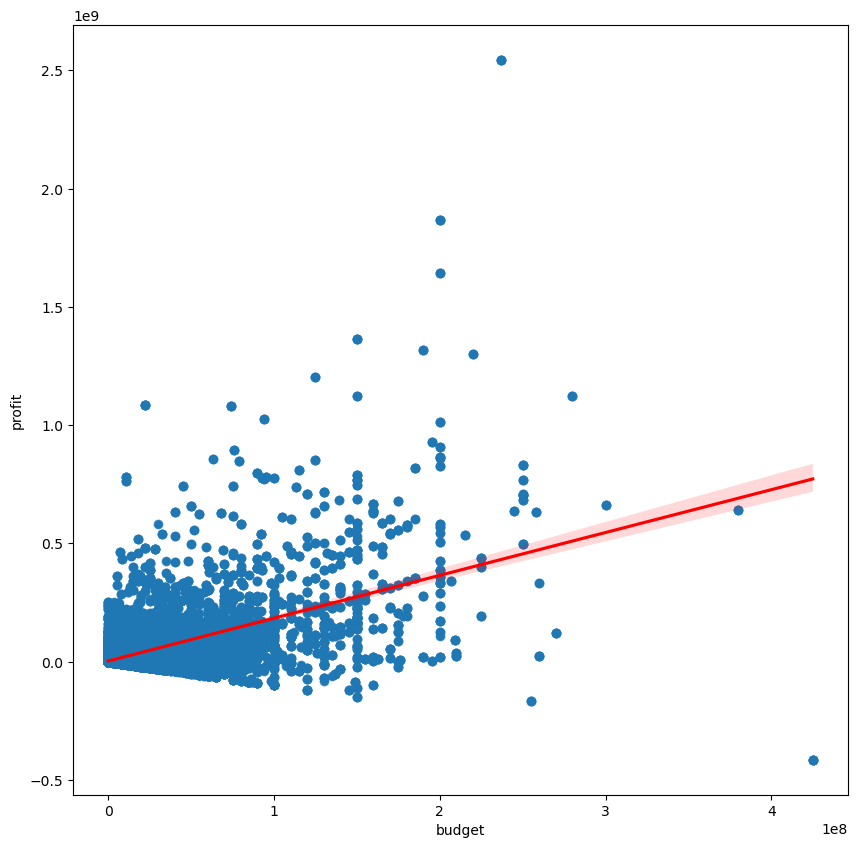

In [308]:
movies_decent_sample.plot.scatter(x = 'budget', y = 'profit', figsize = (10,10)) 
sns.regplot(x = 'budget', y = 'profit', data = movies_decent_sample, line_kws = {'color': 'red'})

<Axes: xlabel='budget', ylabel='popularity'>

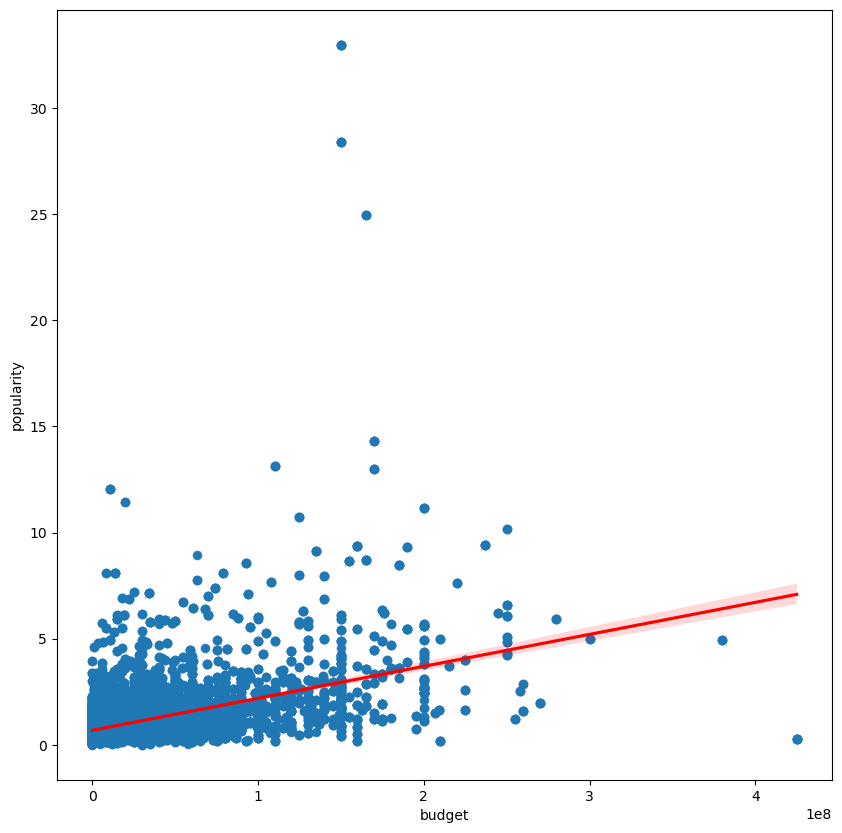

In [310]:
movies_decent_sample.plot.scatter(x = 'budget', y = 'popularity', figsize = (10,10)) 
sns.regplot(x = 'budget', y = 'popularity', data = movies_decent_sample, line_kws = {'color': 'red'})

,popularity,budget,revenue,profit,original_title,runtime,release_date,vote_count,vote_average,genre(s)
0,32.985763,150000000,1513528810,1363528810,Jurassic World,124,6/9/15,5562,6.500000,Action
0,32.985763,150000000,1513528810,1363528810,Jurassic World,124,6/9/15,5562,6.500000,Adventure
0,32.985763,150000000,1513528810,1363528810,Jurassic World,124,6/9/15,5562,6.500000,Science Fiction
0,32.985763,150000000,1513528810,1363528810,Jurassic World,124,6/9/15,5562,6.500000,Thriller
1,28.419936,150000000,378436354,228436354,Mad Max: Fury Road,120,5/13/15,6185,7.100000,Action
...,...,...,...,...,...,...,...,...,...,...
10863,0.065141,0,0,0,Beregis Avtomobilya,94,1/1/66,11,6.500000,Mystery
10863,0.065141,0,0,0,Beregis Avtomobilya,94,1/1/66,11,6.500000,Comedy
10864,0.064317,0,0,0,"What's Up, Tiger Lily?",80,11/2/66,22,5.400000,Action
10864,0.064317,0,0,0,"What's Up, Tiger Lily?",80,11/2/66,22,5.400000,Comedy


In [324]:
year_genre = pd.DataFrame(movies_sub.groupby(['release_year', 'genre(s)'])['profit'].mean())

In [332]:
genre_pt = pd.pivot_table(year_genre, values = 'profit', index = ['genre(s)'], columns = ['release_year'])

Text(0.5, 1.0, 'Genre by Profit by Year')

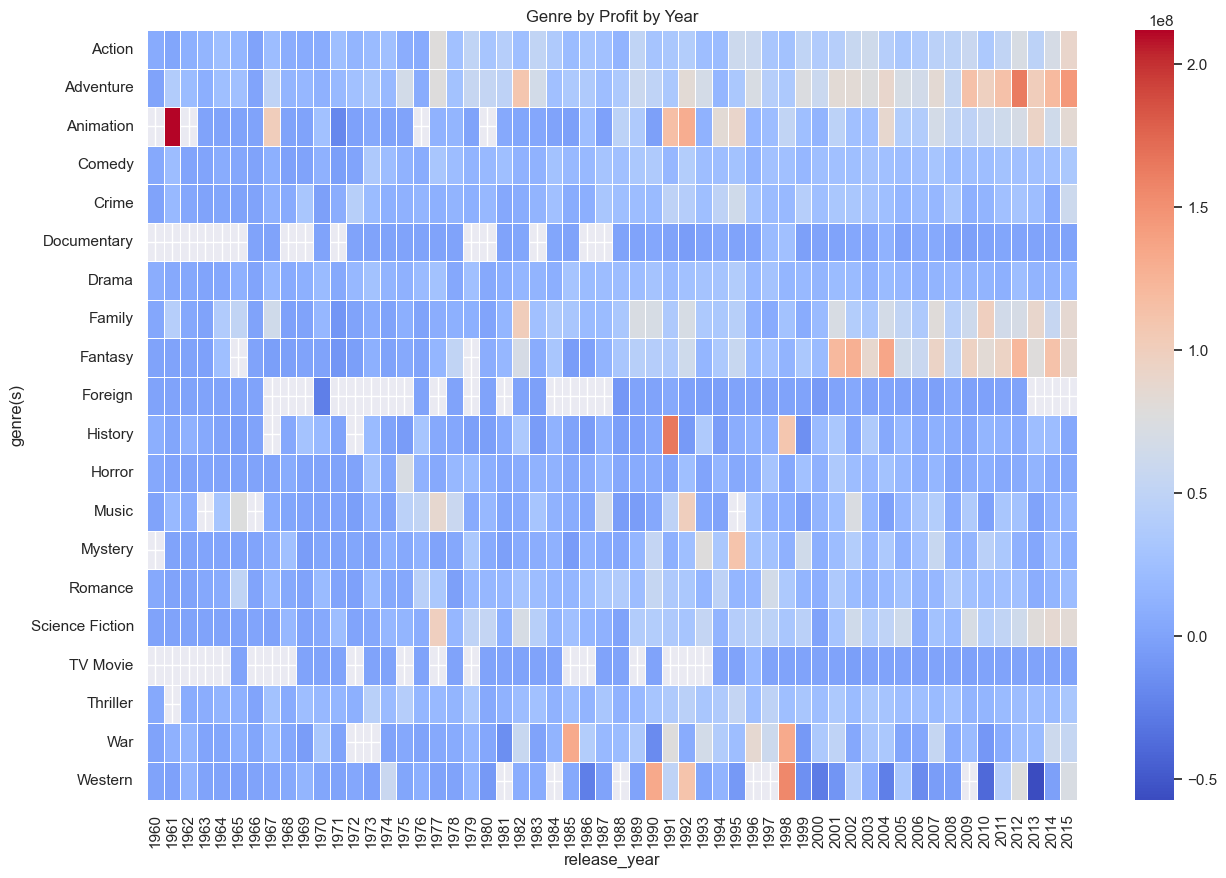

In [342]:
sns.set(rc = {'figure.figsize' : (15, 10)})
sns.heatmap(genre_pt, cmap = 'coolwarm', linewidths = .5).set_title('Genre by Profit by Year')